### Treść

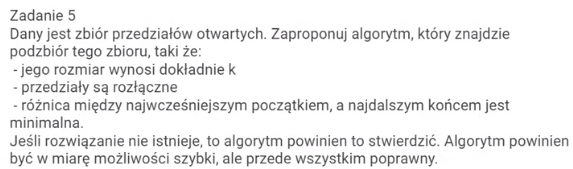

### Omówienie algorytmu

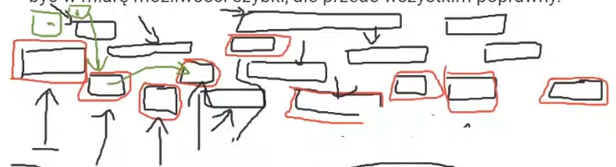

W obu poniższych algorytmach przyjąłem tę samą zasadę znajdowania rozwiązania. Najpierw sortujemy przedziały po drugiej współrzędnej, a następnie korzystamy ze zmodyfikowanej wersji algorytmu do szeregowania zadań z wykładu, w celu znalezienia największego zagęszczenia kolejnych przedziałów. Aby rozwiązanie działało nieco szybciej, nie wyznaczam dla każdego spośród $ n - k $ możliwych początków wynikowych podzbiorów wszystkich jego kolejnych elementów na nowo, a jedynie, jeżeli znajdę rozwiązanie k-elementowe, w kolejnych krokach przechodzę dalej, czyli odrzucam pierwszy przedział z poprzedniego rozwiązania i dodaję nowy, spełniający warunki (nienachodzący na poprzedni) do nowego k-elementowego rozwiązania. Dzięki temu, za każdym razem przesuwam się o 1 przedział (oczywiście może być konieczne pominięcie dużej liczby przedziałów, które na siebie nachodzą, ale i tak jest to dobre rozwiązanie, bo nie budujemy za każdym razem podzbioru od początku). Oczywiście konieczne jest zawsze sprawdzenie, czy rozpiętość nowego przedziału jest lepsza od poprzedniego kandydata na najlepsze rozwiązanie i zapamiętanie obecnie najlepszego rozwiązania. <br>
Tutaj nasuwa się jedna bardzo ważna obserwacja, dotycząca tego, że nasze rozwiązanie nie musi się koniecznie znajdować w ciągu przedziałów z pierwszego optymalnego rozwiązania problemu szeregowania zadań, a więc na ścieżce, zaczynającej się od pierwszego przedziału w tablicy posortowanych przedziałów. Ścieżki mogą być również rozłączne, więc konieczne jest sprawdzenie wszystkich możliwych początków przedziałów. Ponieważ przyjęliśmy zasadę, że nie budujemy od początku zbioru, będącego tymczasowym rozwiązaniem, a jedynie odrzucamy jeden element i dodajemy jeden nowy, dobrym podejściem jest zapamiętywanie za każdym razem przedziałów, które już włączyliśmy do jednego z poprzednich rozwiązań na którymś z etapów jego poszukiwania (czyli po ludzku, odwiedziliśmy już ten przedział). Wówczas będziemy wiedzieć, że nigdy nie rozpoczniemy poszukiwania nowego ciągu nienachodzących na siebie przedziałów od takiego przedziału, który kiedyś już był uwzględniony. Oczywiście nie spamiętujemy całych ścieżek, a jedynie kandydatów na ich początki, więc już na późniejszym etapie możliwe jest, że ponownie odwiedzimy część przedziałów, które odwiedzaliśmy wcześniej. (Lepiej rozwiązane jest to w drugiej implementacji)

###### Implementacja #1:
Realizuje ona opisane wyżej podejście, z tym, że do zapisywania rozwiązania tymczasowego wykorzystuję listę odsyłaczową (w sposób podobny do kolejki). Jeżeli znajdę taką k-elementową kolejkę, która reprezentuje podzbiór o mniejszej rozpiętości niż poprzedni najmniejszy, nadpisuję poprzednie rozwiązanie (tworzę kopię kolejki w postaci tablicy - tu można dużo poprawić, stąd 2. wersja algorytmu).

###### Implementacja #2:
Działa podobnie do 1. implementacji, ale nie korzystamy już z kolejki i nie zapamiętujemy całego ciągu, ponieważ w łatwy sposób jesteśmy w stanie go odtworzyć później, a samo odtwarzanie jednego ciągu wynikowego jest dużo szybsze niż kopiowanie wielu tymczasowych rozwiązań. Wówczas najlepszym podejściem jest podzielenie sobie pracy na etapy i najpierw znalezienie 1. ciągu k-elementowego, który zaczyna się w elemencie (wcześniej nieodwiedzanym) o indeksie $ i $. Wówczas, jeżeli mamy już pierwszy podciąg, wystarczy przesuwać się z "oknem", odrzucając ostatni element i dodając jeden nowy (bez konieczności sprawdzania za każdym razem liczby elementów, ponieważ utrzymujemy ją stale równą $ k $). Do realizacji przesuwania się wykorzystamy drugą funkcję. Oczywiście znów, za każdym razem zapamiętujemy najlepszy podciąg (podzbiór), ale tym razem tylko indeks pierwszego elementu i długość (bo musimy jakoś wiedzieć, czy inny jest krótszy). Na koniec, w podobny sposób jak tworzyliśmy pierwszy ciąg, odtwarzamy najlepsze rozwiązanie.

### Złożoność

##### Implementacja #1
###### Obliczeniowa
$ O((n - k) \cdot n \cdot k + k \cdot log(k)) = | k < n | = O(n^2 \cdot k) $ - bo potencjalnie będziemy musieli sprawdzić każdy z możliwych $ n - k $ początków oraz po drodze za każdym razem $ n $ przedziałów, a także, jeżeli będziemy mieli pecha i każde następne rozwiązanie będzie lepsze od poprzedniego, zawsze będziemy kopiować cały ciąg, a więc $ k $ elementów.
###### Pamięciowa
$ O(n + k) = | k < n | = O(n) $
##### Implementacja #2
###### Obliczeniowa
$ O() $

### Implementacja #1
##### Wolniejsza - z użyciem kolejki

In [1]:
from collections import deque  # Linked list


def spans_subset(S: 'array of time spans', k: 'number of spans'):
    if k == 0: return []
    
    inf = float('inf')
    if k == 1:
        res = (-inf, inf)
        for span in S:
            if span[1] - span[0] < res[1] - res[0]:
                res = span
        return [res]
    
    # Sort all spans by their second coordinate
    S.sort(key=lambda s: s[1])
    # Using concept similar to the job sequencing algorithm, find all subsets
    # of closest spans
    n = len(S)
    F = [False] * n  # We will mark visited spans here
    
    best_subset = [(-inf, 0), (0, inf)]  # Store some placeholder values
        
    for i in range(n - k + 1):  # Loop over all possible beginning spans
        # Proceed only if the span hasn't been processed yet
        if not F[i]:
            subset = deque([S[i]])
            for j in range(i + 1, n):
                if S[j][0] > subset[-1][1]:
                    F[j] = True
                    subset.append(S[j])
                    if len(subset) == k:
#                         print(subset, first, last)
                        if S[j][1] - subset[0][0] < best_subset[-1][1] - best_subset[0][0]:
                            best_subset = list(subset)
                        subset.popleft()
    
    return best_subset if best_subset[0][0] != -inf else None

###### Kilka testów

In [2]:
A = [(16.32, 18.12), (1.50, 2.43), (6.54, 9.10), (16.10, 18.25), (1.45, 2.50), (1.32, 2.55), 
     (0.42, 2.05), (2.10, 6.30), (8.55, 17.22), (15.55, 19.00), (17.35, 20.05)]
k = 3

spans = spans_subset(A, k)
print(spans)
print('Result length:', spans[-1][1] - spans[0][0])

[(0.42, 2.05), (2.1, 6.3), (6.54, 9.1)]
Result length: 8.68


In [3]:
A = [(3.15, 8.04), (2.05, 5.42), (9.05, 11.33), (2, 2.24), (0.25, 2.24), (10.25, 16.42), (12.05, 17.55), (1.12, 3.45)]
k = 2

spans = spans_subset(A, k)
print(spans)
print('Result length:', spans[-1][1] - spans[0][0])

[(2, 2.24), (3.15, 8.04)]
Result length: 6.039999999999999


### Implementacja #2
##### Szybsza - z zapamiętywaniem jedynie początku i długości najlepszego rozwiązania

In [4]:
def find_first_subset(S, k, sub_begin):
    n = len(S)
    count = 1
    sub_end = sub_begin
    j = sub_begin + 1
    # Look for the first k matching spans
    while count < k and j < n:
        if S[j][0] >= S[sub_end][1]:
            count += 1
            sub_end = j
        j += 1
    return sub_end if count == k else -1


def find_best_subset(S, k, sub_begin, sub_end):
    best_length = S[sub_end][1] - S[sub_begin][0]
    best_begin = sub_begin
    j = sub_end + 1
    n = len(S)
    
    while j < n:
        if S[j][0] >= S[sub_end][1]:
            sub_end = j
            # Drop the first one span (the second span of the current
            # subsequence must begin just after the first one (which we drop)
            # ends. That is why wy loop as long as the current span begins
            # somewhere inside the dropped span. The first one we find that
            # begins after a dropped one span will be a new beginning)
            m = sub_begin + 1
            while S[m][0] <= S[sub_begin][1]:
                m += 1
            sub_begin = m
            # Update the min length if found a better one
            if S[sub_end][1] - S[sub_begin][0] < best_length:
                best_length = S[sub_end][1] - S[sub_begin][0]
                best_begin = sub_begin
        j += 1
        
    return best_begin, best_length


def restore_solution(S, k, best_begin):
    last = best_begin
    i = last + 1
    res = [S[last]]
    
    while len(res) < k:
        if S[i][0] >= S[last][1]:
            res.append(S[i])
            last = i
        i += 1
        
    return res

        
def spans_subset(S: 'array of time spans', k: 'number of spans'):
    if k == 0: return []
    
    inf = float('inf')
    if k == 1:
        res = (-inf, inf)
        for span in S:
            if span[1] - span[0] < res[1] - res[0]:
                res = span
        return [res]
    
    # Sort all spans by their second coordinate
    S.sort(key=lambda s: s[1])
    # Using concept similar to the job sequencing algorithm, find all subsets
    # of closest spans
    n = len(S)
    F = [False] * n  # We will mark visited spans here
    
    best_length = float('inf')
    best_begin = -1
        
    for i in range(n - k + 1):  # Loop over all possible beginning spans
        # Proceed only if the span hasn't been processed yet
        if not F[i]:
            F[i] = True
            sub_begin = i
            sub_end = find_first_subset(S, k, i)
            # Move to the next begin span when cannot get k spans right now
            if sub_end < 0: continue
            # Update current best if found a shorter one than the previous shortest
            if S[sub_end][1] - S[sub_begin][0] < best_length:
                best_length = S[sub_end][1] - S[sub_begin][0]
                best_begin = sub_begin
            # Else, move our k-element window and drop the first span and add a new one
            # till we reach the end
            sub_begin, sub_length = find_best_subset(S, k, sub_begin, sub_end)
            # Update the best result if found a better one
            if sub_length < best_length:
                best_length = sub_length
                best_begin = sub_begin
                
    return restore_solution(S, k, best_begin) if best_begin >= 0 else []

In [5]:
A = [(16.32, 18.12), (1.50, 2.43), (6.54, 9.10), (16.10, 18.25), (1.45, 2.50), (1.32, 2.55), 
     (0.42, 2.05), (2.10, 6.30), (8.55, 17.22), (15.55, 19.00), (17.35, 20.05)]
k = 3

spans = spans_subset(A, k)
print(spans)
print('Result length:', spans[-1][1] - spans[0][0])

[(0.42, 2.05), (2.1, 6.3), (6.54, 9.1)]
Result length: 8.68


In [6]:
A = [(3.15, 8.04), (2.05, 5.42), (9.05, 11.33), (2, 2.24), (0.25, 2.24), (10.25, 16.42), (12.05, 17.55), (1.12, 3.45)]
k = 2

spans = spans_subset(A, k)
print(spans)
print('Result length:', spans[-1][1] - spans[0][0])

[(2, 2.24), (3.15, 8.04)]
Result length: 6.039999999999999
